## Observations and Insights 

1) Capomulin has been shown to reduce tumor volume over time.

2) Capomulin is comparable to Remicane in keeping final tumor volume reduced compared to the other leading drug regimens.

3) Capomulin and Ramicane  both have similar statistical results when looking at the statistical summaries that compare all
   of the leading drug regimens.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")
# Display the data table for preview
mouse_results_df.sort_values(["Mouse ID", "Timepoint"]).head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
num_mice = len(mouse_results_df["Mouse ID"].unique())
print(f'The total number of mice in the dataset: {num_mice}')

The total number of mice in the dataset: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

id_timepoint_filter = mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")
duplicate_mouse_df = mouse_results_df[id_timepoint_filter]

duplicate_mouse_id = duplicate_mouse_df["Mouse ID"]
duplicate_mouse_id = duplicate_mouse_id.unique()
print(f"The duplicate mouse id's for Mouse ID and Timepoint include: {duplicate_mouse_id}")

The duplicate mouse id's for Mouse ID and Timepoint include: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep="first", inplace=True)
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame
num_mice_clean_df = len(mouse_results_df["Mouse ID"].unique())
print(f'The number of mice in the clean DataFrame: {num_mice_clean_df}')

The number of mice in the clean DataFrame: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groups = mouse_results_df.groupby(["Drug Regimen"])

regimen_mean = regimen_groups["Tumor Volume (mm3)"].mean()
regimen_mean.rename("Tumor Volume (mm3) - Mean", inplace = True)

regimen_median = regimen_groups["Tumor Volume (mm3)"].median()
regimen_median.rename("Tumor Volume (mm3) - Median", inplace = True)

regimen_variance = regimen_groups["Tumor Volume (mm3)"].var()
regimen_variance.rename("Tumor Volume (mm3) - VAR", inplace = True)

regimen_std = regimen_groups["Tumor Volume (mm3)"].std()
regimen_std.rename("Tumor Volume - STD", inplace = True)

regimen_sem = regimen_groups["Tumor Volume (mm3)"].sem()
regimen_sem.rename("Tumor Volume (mm3) - SEM", inplace = True)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_sum_stats_df = pd.concat([regimen_mean, regimen_median, regimen_variance, regimen_std, regimen_sem], axis = 1)
regimen_sum_stats_df


,Tumor Volume (mm3) - Mean,Tumor Volume (mm3) - Median,Tumor Volume (mm3) - VAR,Tumor Volume - STD,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
mouse_results_df2 = mouse_results_df
regimen_groups2 = mouse_results_df2.groupby(["Drug Regimen"])

mouse_results_df2 = regimen_groups2["Tumor Volume (mm3)"].describe()
mouse_results_df2.drop(columns = ["count", "25%", "50%", "75%", "max", "min"], inplace = True)

#Add additional summary statistics columns
mouse_results_df2["Tumor Volume (mm3) - Median"] = regimen_groups2["Tumor Volume (mm3)"].median()
mouse_results_df2["Tumor Volume (mm3) - VAR"] = regimen_groups2["Tumor Volume (mm3)"].var()
mouse_results_df2["Tumor Volume (mm3) - SEM"] = regimen_groups2["Tumor Volume (mm3)"].sem()

# Rename first two columns
mouse_results_df2.rename(columns = {"mean" : "Tumor Volume (mm3) - Mean", "std" : "Tumor Volume (mm3) - STD"}, inplace = True)
# # Reorder columns
mouse_results_df2 = mouse_results_df2[["Tumor Volume (mm3) - Mean","Tumor Volume (mm3) - Median",
                                       "Tumor Volume (mm3) - VAR","Tumor Volume (mm3) - STD","Tumor Volume (mm3) - SEM"]]
mouse_results_df2

,Tumor Volume (mm3) - Mean,Tumor Volume (mm3) - Median,Tumor Volume (mm3) - VAR,Tumor Volume (mm3) - STD,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

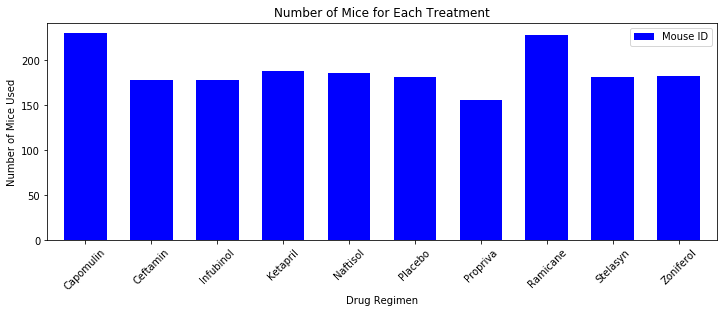

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plot_mice_df = regimen_groups["Mouse ID"].count()
plot_mice_df =pd.DataFrame(plot_mice_df)
plot_mice_df

#Use pandas to plot the bar chart
mice_used_plot = plot_mice_df.plot(kind="bar", figsize=(12,4), use_index=True, color="blue", width=0.65)

#Set the titles and labels
mice_used_plot.set_xticklabels(plot_mice_df.index, rotation=45)
mice_used_plot.set_xlabel("Drug Regimen")
mice_used_plot.set_ylabel("Number of Mice Used")
mice_used_plot.set_title("Number of Mice for Each Treatment")

plt.show()

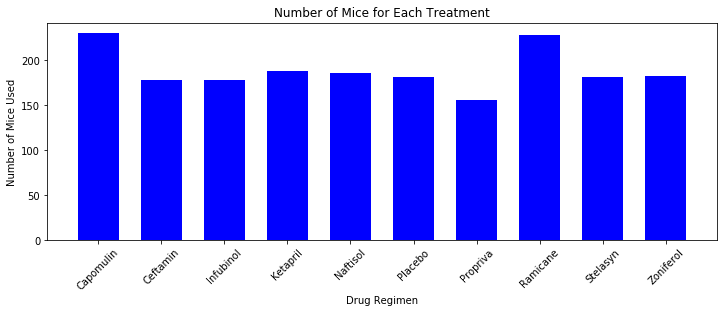

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plot_mice_df = regimen_groups["Mouse ID"].count()
plot_mice_df =pd.DataFrame(plot_mice_df)
plot_mice_df

x_axis = np.arange(len(plot_mice_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,4))
#Use pyplot to plot the bar chart
plt.bar(x_axis, plot_mice_df["Mouse ID"], color="blue", align = "center", width=0.65)

#Set the titles and labels
plt.xticks(tick_locations, plot_mice_df.index.values, rotation=45)
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Used")

plt.savefig("Images/Mice_used_by_treatments.png")
plt.show()


Text(0.5, 1.0, '% of Male to Female Mice')

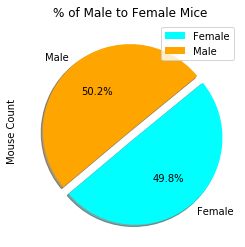

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a dataframe of Mouse ID's and the sex of each mouse
plot_male_female = mouse_results_df.groupby("Mouse ID")
mouse_gender_df = plot_male_female["Sex"].first()
mouse_gender_count_df = pd.DataFrame(mouse_gender_df)

# Create a dataframe that groups the mouse gender and provides a count of each gender
mouse_gender_count = mouse_gender_count_df.groupby("Sex")
mouse_gender_count_df = mouse_gender_count["Sex"].count()
m_gender_count_df = pd.DataFrame(mouse_gender_count_df)
m_gender_count_df.rename(columns = {"Sex" : "Mouse Count"}, inplace = True)
m_gender_count_df

colors = ["cyan" , "orange"]

# plot a pie plot using pandas
m_gender_count_df.plot(kind="pie", y="Mouse Count", figsize=(12,4), autopct="%1.1f%%", 
                       explode = [0.1, 0], startangle = 220, shadow=True, colors=colors)

plt.title("% of Male to Female Mice")



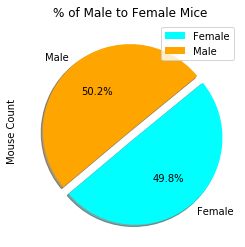

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a dataframe of Mouse ID's and the sex of each mouse
plot_male_female = mouse_results_df.groupby("Mouse ID")
mouse_gender_df = plot_male_female["Sex"].first()
mouse_gender_count_df = pd.DataFrame(mouse_gender_df)

# Create a dataframe that groups the mouse gender and provides a count of each gender
mouse_gender_count = mouse_gender_count_df.groupby("Sex")
mouse_gender_count_df = mouse_gender_count["Sex"].count()
m_gender_count_df = pd.DataFrame(mouse_gender_count_df)
m_gender_count_df.rename(columns = {"Sex" : "Mouse Count"}, inplace = True)
m_gender_count_df

labels = m_gender_count_df.index
sizes = m_gender_count_df["Mouse Count"]
colors = ["cyan" , "orange"]

# plot a pie plot using pyplot
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", explode = [0.1, 0], startangle=220)

plt.title("% of Male to Female Mice")
plt.ylabel("Mouse Count")
plt.legend()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_filter=mouse_results_df["Drug Regimen"].isin(treatments)
four_treatment_df = mouse_results_df[treatment_filter]
four_treatment_df

# Start by getting the last (greatest) timepoint for each mouse
group_four_treatments = four_treatment_df.groupby("Mouse ID")
four_treatment_tp_df = group_four_treatments["Timepoint"].max()
four_treatment_tp_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_treatment_reg_df = pd.merge(four_treatment_df, four_treatment_tp_df, on="Mouse ID", how="left", suffixes=["_original", "_max"])
four_treatment = four_treatment_reg_df.groupby("Mouse ID")
four_treatment_reg_df = four_treatment[["Mouse ID","Drug Regimen","Sex","Age_months","Timepoint_max","Tumor Volume (mm3)","Metastatic Sites"]].max()
four_treatment_reg_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Timepoint_max,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,a203,Infubinol,Female,20,45,67.973419,2
a251,a251,Infubinol,Female,21,45,65.525743,1
a275,a275,Ceftamin,Female,20,45,62.999356,3
a411,a411,Ramicane,Male,3,45,45.466677,1
a444,a444,Ramicane,Female,10,45,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []

# Create a treatment object in the df to loop through
treatment = four_treatment_reg_df.groupby("Drug Regimen")

# Create a list comprehension to populate the treatment_list array
treatment_list = [treatments for treatments, data in treatment]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume = four_treatment_reg_df["Tumor Volume (mm3)"]
quartiles = tumor_volume.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f'The lower quartile of Tumor Volume (mm3) is: {round(lowerq,1)}')
print(f'The upper quartile of Tumor Volume (mm3) is: {round(upperq,1)}')
print(f'The interquartile range of Tumor Volume (mm3) is: {round(iqr,1)}')
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# Create a tumor_vol object in the df to loop through
tumor_vol = four_treatment_reg_df.groupby("Tumor Volume (mm3)")

# Create a list comprehension to populate the tumor_vol_data list array
tumor_vol_data = [tvolumes for tvolumes, data in tumor_vol]    
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'\nValues below {round(lower_bound,1)} could be outliers.')
print(f'Values above {round(upper_bound,1)} could be outlers.')

    

The lower quartile of Tumor Volume (mm3) is: 45.5
The upper quartile of Tumor Volume (mm3) is: 59.9
The interquartile range of Tumor Volume (mm3) is: 14.4

Values below 23.9 could be outliers.
Values above 81.6 could be outlers.


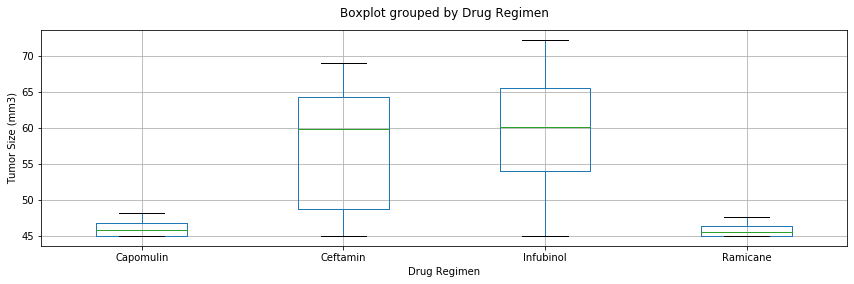

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

four_treatment_reg_df.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)", figsize=(14,4), rot=0, grid=True)
plt.title("")
plt.ylabel("Tumor Size (mm3)")

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

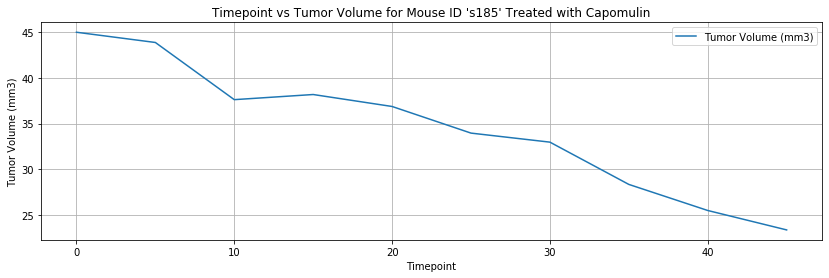

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter the dataframe for mice treated with Capomulin
mouse_results_capo_m_df = mouse_results_df[mouse_results_df["Drug Regimen"] == "Capomulin"]
mouse_results_capo_m_df
mouse_results_capo_m_df = mouse_results_capo_m_df[mouse_results_capo_m_df["Mouse ID"] == "s185"]
mouse_results_capo_m_df

m_id = mouse_results_capo_m_df["Mouse ID"].iloc[1]

#Group the dataframe by Timepoint and pull the average Tumor Volume
timepoint = mouse_results_capo_m_df.groupby("Timepoint")
mouse_results_capo_m_df = timepoint["Tumor Volume (mm3)"].mean()
mouse_results_capo_m_df = pd.DataFrame(mouse_results_capo_m_df)
mouse_results_capo_m_df

mouse_results_capo_m_df.plot(kind="line", y="Tumor Volume (mm3)", figsize=(14,4), grid=True)

plt.title(f"Timepoint vs Tumor Volume for Mouse ID '{m_id}' Treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")


Text(22, 39, 'y = 0.89x + 22.76')

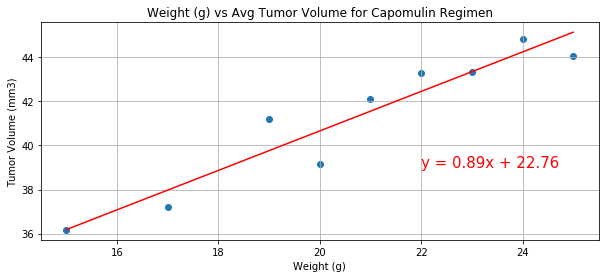

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter the dataframe for mice treated with Capomulin
capo_filter = mouse_results_df["Drug Regimen"] == "Capomulin"
mouse_results_capo_weight_df = mouse_results_df[capo_filter]
mouse_results_capo_weight_df

#Group the dataframe by weight and pull the average Tumor Volume
m_weight = mouse_results_capo_weight_df.groupby("Weight (g)")
mouse_results_capo_weight_df = m_weight["Tumor Volume (mm3)"].mean()
mouse_results_capo_weight_df = pd.DataFrame(mouse_results_capo_weight_df)
mouse_results_capo_weight_df = mouse_results_capo_weight_df.reset_index()
mouse_results_capo_weight_df


# Create a scatter plot
plt.figure(figsize=(10,4))
plt.grid()
plt.scatter(mouse_results_capo_weight_df.iloc[:,0], mouse_results_capo_weight_df.iloc[:,1])

# Add title and labels
plt.title("Weight (g) vs Avg Tumor Volume for Capomulin Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

# Calculate the linear regression line
x_values = mouse_results_capo_weight_df.iloc[:,0]
y_values = mouse_results_capo_weight_df.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Insert the linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,39),fontsize=15,color="red")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = mouse_results_capo_weight_df.iloc[:,0]
tumor_volume = mouse_results_capo_weight_df.iloc[:,1]
correlation = st.pearsonr(weight, tumor_volume)
print(f'The correlation between weight and tumor_volume is: {round(correlation[0],2)}')

The correlation between weight and tumor_volume is: 0.95
